In [1]:
# Fix relative import for utils
import sys
if '..' not in sys.path: sys.path.append('..')

In [2]:
from utils import misc_util
from utils import display as dplay
from utils import Adni

import os
import numpy as np
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [18]:
base_dir = '../data/'
adni = Adni(base_dir, processed=True)

# Load data

In [19]:
adni.load(show_output=False)

('../data/SPM_preprocessed_normalized/', ['projectIdentifier', 'subject.subjectIdentifier', 'subject.study.series.modality', 'subject.study.imagingProtocol.description', 'subject.study.series.dateAcquiredPrecise', 'image_nbr', 'series', 'subject.study.imagingProtocol.imageUID', 'filename', 'path'], <bound method Adni.info_from_raw_filename of <utils.adni.Adni object at 0x7fa6dc73a490>>)


## Display MetaData

In [20]:
meta_df = adni.meta_to_df()

Processing type of:
	 float: subject.study.subjectAge
	 float: subject.study.weightKg
	 float: subject.visit.assessment.component.assessmentScore_MMSCORE
	 float: subject.visit.assessment.component.assessmentScore_GDTOTAL
	 float: subject.visit.assessment.component.assessmentScore_CDGLOBAL
	 float: subject.visit.assessment.component.assessmentScore_NPISCORE
	 float: subject.visit.assessment.component.assessmentScore_FAQTOTAL
	 category: subject.researchGroup
	 string: subject.subjectSex
	 datetime64[ns]: subject.study.series.dateAcquired


In [21]:
dplay.display_all_pd_cols(meta_df)

,projectIdentifier,projectDescription,siteKey,subject.subjectIdentifier,subject.researchGroup,subject.subjectSex,subject.subjectInfo_APOE A1,subject.subjectInfo_APOE A2,subject.visit.visitIdentifier,subject.visit.assessment.component.assessmentScore_MMSCORE,subject.visit.assessment.component.assessmentScore_GDTOTAL,subject.visit.assessment.component.assessmentScore_CDGLOBAL,subject.visit.assessment.component.assessmentScore_NPISCORE,subject.visit.assessment.component.assessmentScore_FAQTOTAL,subject.study.studyIdentifier,subject.study.subjectAge,subject.study.ageQualifier,subject.study.weightKg,subject.study.postMortem,subject.study.series.seriesIdentifier,subject.study.series.modality,subject.study.series.dateAcquired,subject.study.imagingProtocol.imageUID,subject.study.imagingProtocol.description,subject.study.imagingProtocol.protocolTerm.protocol_Manufacturer,subject.study.imagingProtocol.protocolTerm.protocol_Mfg Model,subject.study.imagingProtocol.protocolTerm.protocol_Radiopharmaceutical,subject.study.imagingProtocol.protocolTerm.protocol_Number of Rows,subject.study.imagingProtocol.protocolTerm.protocol_Number of Columns,subject.study.imagingProtocol.protocolTerm.protocol_Number of Slices,subject.study.imagingProtocol.protocolTerm.protocol_Frames,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing X,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing Y,subject.study.imagingProtocol.protocolTerm.protocol_Slice Thickness,subject.study.imagingProtocol.protocolTerm.protocol_Convolution Kernel,subject.study.imagingProtocol.protocolTerm.protocol_Counts Source,subject.study.imagingProtocol.protocolTerm.protocol_Attenuation Correction,subject.study.imagingProtocol.protocolTerm.protocol_Decay Correction,subject.study.imagingProtocol.protocolTerm.protocol_Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol_Scatter Correction,subject.study.imagingProtocol.protocolTerm.protocol_Radioisotope,subject.study.imagingProtocol.protocolTerm.protocol_Randoms Correction
552,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_1155,MCI,M,3,3,ADNI3 Initial Visit-Cont Pt,NaN,NaN,NaN,NaN,NaN,110661,68.2464,Y,65.7700,F,559508,PET,2017-04-28,I844882,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
660,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_4225,CN,M,3,4,ADNI3 Initial Visit-Cont Pt,NaN,NaN,NaN,NaN,NaN,128889,77.0897,Y,80.7400,F,748996,PET,2018-11-16,I1075221,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
174,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_6652,MCI,F,NaN,NaN,ADNI Baseline,NaN,NaN,NaN,NaN,NaN,135932,86.4668,Y,73.4800,F,818824,PET,2019-01-18,I1158636,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,89.0,6.0,2.0,2.0,2.0,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
161,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_6695,MCI,M,NaN,NaN,ADNI Baseline,NaN,NaN,NaN,NaN,NaN,135434,66.4120,Y,61.6900,F,814384,PET,2019-04-09,I1152976,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
524,ADNI,Alzheimer's Disease Neuroimaging Initiative,003,003_S_0908,MCI,F,2,3,ADNI3 Initial Visit-Cont Pt,NaN,NaN,NaN,NaN,NaN,120929,74.4203,Y,73.0284,F,667285,PET,2018-03-13,I974047,ADNI3_FDG (AC),SIEMENS,Biograph64_TruePoint,18F-FDG,336.0,336.0,109.0,6.0,1.01821,1.01821,2.027,All-pass,EMISSION,"measured,AC_CT",START,OSEM3D 4i21s,Model-based,F-18,DLYD


# Display ImageFiles

In [22]:
files_df = adni.files_to_df()

In [23]:
dplay.display_all_pd_cols(files_df)

,projectIdentifier,subject.subjectIdentifier,subject.study.series.modality,subject.study.imagingProtocol.description,subject.study.series.dateAcquiredPrecise,image_nbr,series,subject.study.imagingProtocol.imageUID,filename,path
0,ADNI,041_S_1418,PET,30_min_3D_FDG__4i_16s_,20101108092713710,1,S94411,I203170,iwADNI_041_S_1418_PET_30_min_3D_FDG__4i_16s__b...,../data/SPM_preprocessed_normalized/ADNI1iwADN...
1,ADNI,018_S_0142,PT,ADNI_Static_Brain__6x5__,20090211165243667,1,S62959,I135811,iwADNI_018_S_0142_PT_ADNI_Static_Brain__6x5___...,../data/SPM_preprocessed_normalized/ADNI1iwADN...
2,ADNI,012_S_1175,PT,ADNIstaticBrain_6x5_,20090115133549590,15,S61892,I133846,iwADNI_012_S_1175_PT_ADNIstaticBrain_6x5__br_r...,../data/SPM_preprocessed_normalized/ADNI1iwADN...
3,ADNI,072_S_1380,PT,ADNI_BRAIN,20100402132501438,21,S82719,I170088,iwADNI_072_S_1380_PT_ADNI_BRAIN_br_raw_2010040...,../data/SPM_preprocessed_normalized/ADNI1iwADN...
4,ADNI,012_S_1165,PT,ADNIstaticBrain_6x5_,20090121121957236,12,S62063,I134221,iwADNI_012_S_1165_PT_ADNIstaticBrain_6x5__br_r...,../data/SPM_preprocessed_normalized/ADNI1iwADN...


In [24]:
df = adni.to_df()

Processing type of:
	 float: subject.study.subjectAge
	 float: subject.study.weightKg
	 float: subject.visit.assessment.component.assessmentScore_MMSCORE
	 float: subject.visit.assessment.component.assessmentScore_GDTOTAL
	 float: subject.visit.assessment.component.assessmentScore_CDGLOBAL
	 float: subject.visit.assessment.component.assessmentScore_NPISCORE
	 float: subject.visit.assessment.component.assessmentScore_FAQTOTAL
	 category: subject.researchGroup
	 string: subject.subjectSex
	 datetime64[ns]: subject.study.series.dateAcquired


In [25]:
df

,projectIdentifier_x,subject.subjectIdentifier,subject.study.series.modality_x,subject.study.imagingProtocol.description_x,subject.study.series.dateAcquiredPrecise,image_nbr,series,subject.study.imagingProtocol.imageUID,filename,path,...,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing Y,subject.study.imagingProtocol.protocolTerm.protocol_Slice Thickness,subject.study.imagingProtocol.protocolTerm.protocol_Convolution Kernel,subject.study.imagingProtocol.protocolTerm.protocol_Counts Source,subject.study.imagingProtocol.protocolTerm.protocol_Attenuation Correction,subject.study.imagingProtocol.protocolTerm.protocol_Decay Correction,subject.study.imagingProtocol.protocolTerm.protocol_Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol_Scatter Correction,subject.study.imagingProtocol.protocolTerm.protocol_Radioisotope,subject.study.imagingProtocol.protocolTerm.protocol_Randoms Correction
0,ADNI,041_S_1418,PET,30_min_3D_FDG__4i_16s_,20101108092713710,1,S94411,I203170,iwADNI_041_S_1418_PET_30_min_3D_FDG__4i_16s__b...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0594,2.425,ramp,Dynamic emission,Measured,Start,CPU terative,Simulated 3D,F-18,NaN
1,ADNI,018_S_0142,PT,ADNI_Static_Brain__6x5__,20090211165243667,1,S62959,I135811,iwADNI_018_S_0142_PT_ADNI_Static_Brain__6x5___...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0,4.25,Rad: rectangle 4.000000 mm Ax: rectangle 8.500...,EMISSION,NaN,START,3D Kinahan - Rogers,Gaussian Fit,F-18,RTSUB
2,ADNI,012_S_1175,PT,ADNIstaticBrain_6x5_,20090115133549590,15,S61892,I133846,iwADNI_012_S_1175_PT_ADNIstaticBrain_6x5__br_r...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0,4.25,Rad: rectangle 4.000000 mm Ax: recta...,EMISSION,"measured,, 0.096000 cm-1,",START,3D Kinahan - Rogers,Gaussian Fit,F-18,RTSUB
3,ADNI,072_S_1380,PT,ADNI_BRAIN,20100402132501438,21,S82719,I170088,iwADNI_072_S_1380_PT_ADNI_BRAIN_br_raw_2010040...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.03194,2.0,NaN,EMISSION,CT-derived mu-map,START,OSEM2D 4i14s,Model-based,F-18,DLYD
4,ADNI,012_S_1165,PT,ADNIstaticBrain_6x5_,20090121121957236,12,S62063,I134221,iwADNI_012_S_1165_PT_ADNIstaticBrain_6x5__br_r...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0,4.25,Rad: rectangle 4.000000 mm Ax: recta...,EMISSION,"measured,, 0.096000 cm-1,",START,3D Kinahan - Rogers,Gaussian Fit,F-18,RTSUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,ADNI,010_S_0419,PET,30min_Stat_FDG_-_Iter_Brain_Mod,20100702121726140,1,S88531,I180833,iwADNI_010_S_0419_PET_30min_Stat_FDG_-_Iter_Br...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0594,2.425,ramp,Dynamic emission,Measured,Start,CPU terative,Simulated 3D,F-18,NaN
370,ADNI,033_S_1285,PT,ADNI_STATIC_BRAIN_,20090223164856332,39,S63439,I136761,iwADNI_033_S_1285_PT_ADNI_STATIC_BRAIN__br_raw...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0,3.27,Rad: rectangle 6.300000 mm Ax: rectangle 6.500...,EMISSION,"measured,, 0.096000 cm-1,",START,3D Kinahan - Rogers,Model Based,F-18,RTSUB
371,ADNI,126_S_0891,PT,ADNI_Static_Brain__6x5__,20071002132053256,35,S40827,I76466,iwADNI_126_S_0891_PT_ADNI_Static_Brain__6x5___...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0,4.25,Rad: rectangle 4.000000 mm Ax: recta...,EMISSION,"measured,, 0.096000 cm-1,",START,3D Kinahan - Rogers,Model Based,F-18,RTSUB
372,ADNI,041_S_0262,PET,30_min_3D_FDG__4i_16s_,20090417104216838,1,S66448,I141958,iwADNI_041_S_0262_PET_30_min_3D_FDG__4i_16s__b...,../data/SPM_preprocessed_normalized/ADNI1iwADN...,...,2.0594,2.425,ramp,Dynamic emission,Measured,Start,CPU terative,Simulated 3D,F-18,NaN


# Analysis

### Overview

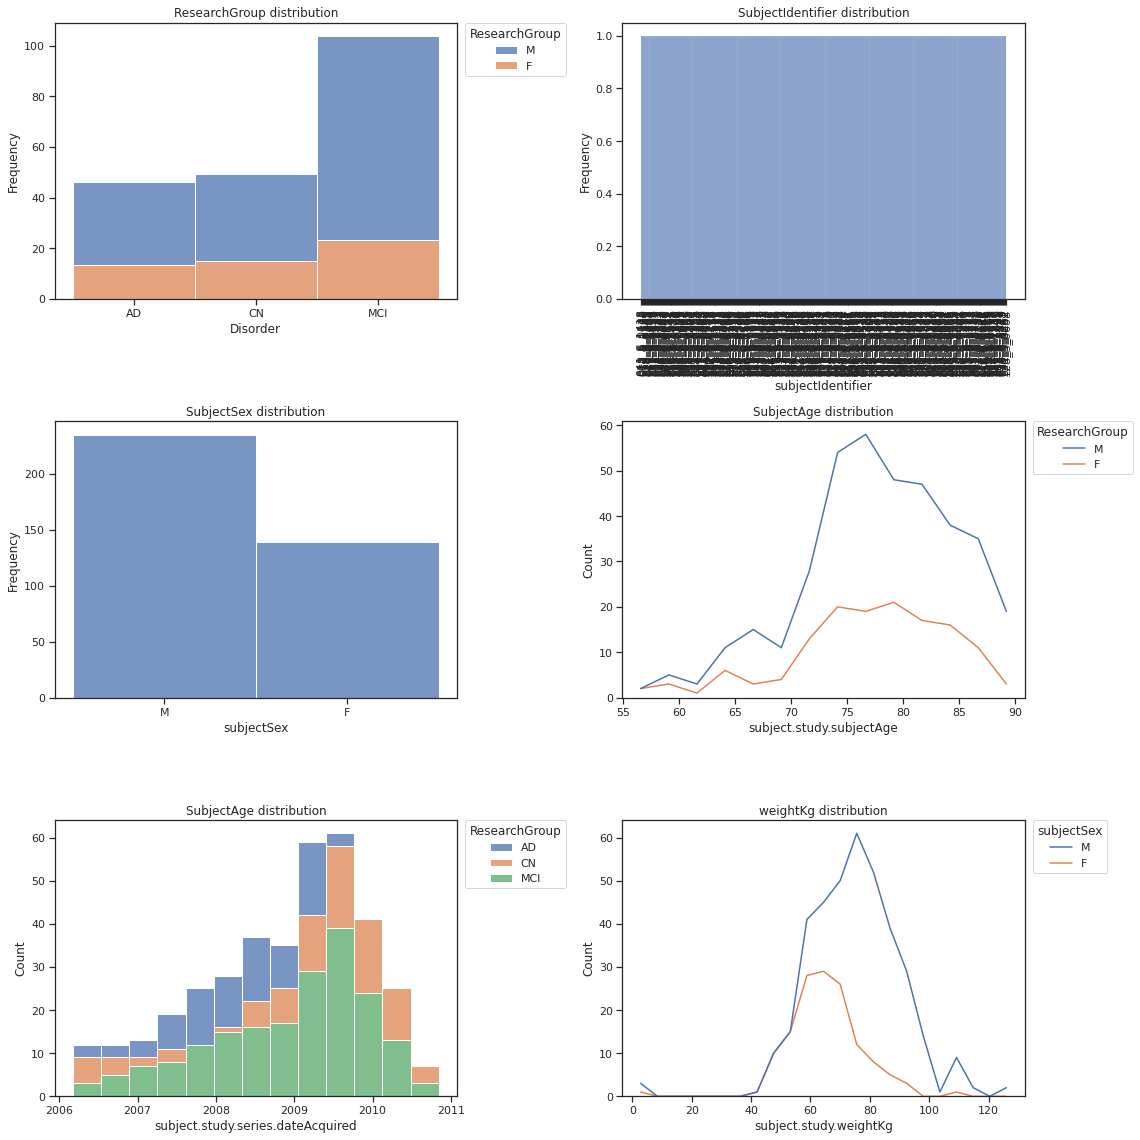

In [26]:
fig, axes = dplay.plot_meta_settings(rows=3)

dplay.do_histplot(
    df, 
    x='subject.researchGroup', 
    hue='subject.subjectSex',
    ax=axes[0,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'ResearchGroup distribution','xlabel':'Disorder'}
)

dplay.do_histplot(
    df, 
    x='subject.subjectIdentifier', 
    ax=axes[0,1],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectIdentifier distribution','xlabel':'subjectIdentifier','rotation':90}
)

dplay.do_histplot(
    df, 
    x='subject.subjectSex', 
    ax=axes[1,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectSex distribution','xlabel':'subjectSex'}
)

dplay.do_histplot(
    df, 
    x='subject.study.subjectAge',
    hue='subject.subjectSex',
    discrete=False,
    ax=axes[1,1],
    plot_kws={'element':'poly','fill':False},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectAge distribution'}
)

dplay.do_histplot(
    df, 
    x='subject.study.series.dateAcquired',
    hue='subject.researchGroup',
    discrete=False,
    ax=axes[2,0],
    plot_kws={},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectAge distribution'}
)

dplay.do_histplot(
    df, 
    x='subject.study.weightKg',
    hue='subject.subjectSex',
    discrete=False,
    ax=axes[2,1],
    plot_kws={'element':'poly','fill':False},
    legend_kws={'title':'subjectSex'},
    setting_kws={'title':'weightKg distribution'}
)


plt.show()

### Data sizes

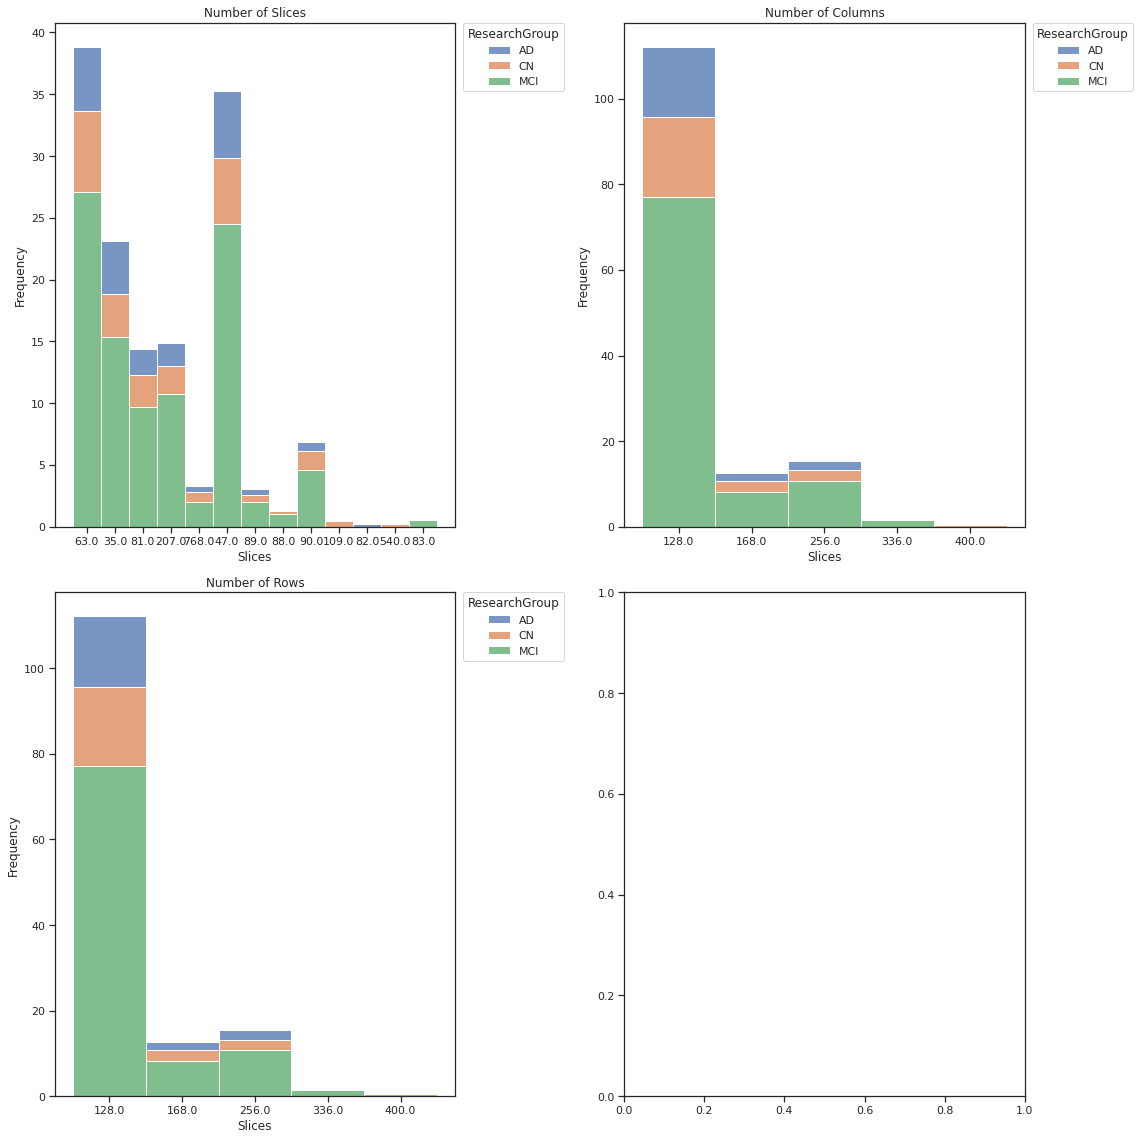

In [27]:
fig, axes = dplay.plot_meta_settings(rows=2)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.study.imagingProtocol.protocolTerm.protocol_Number of Slices', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Number of Slices','xlabel':'Slices','ylabel':'Frequency'}
)
dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.study.imagingProtocol.protocolTerm.protocol_Number of Columns', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,1],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Number of Columns','xlabel':'Slices','ylabel':'Frequency'}
)
dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.study.imagingProtocol.protocolTerm.protocol_Number of Rows', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[1,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Number of Rows','xlabel':'Slices','ylabel':'Frequency'}
)
plt.show()

### Scoring

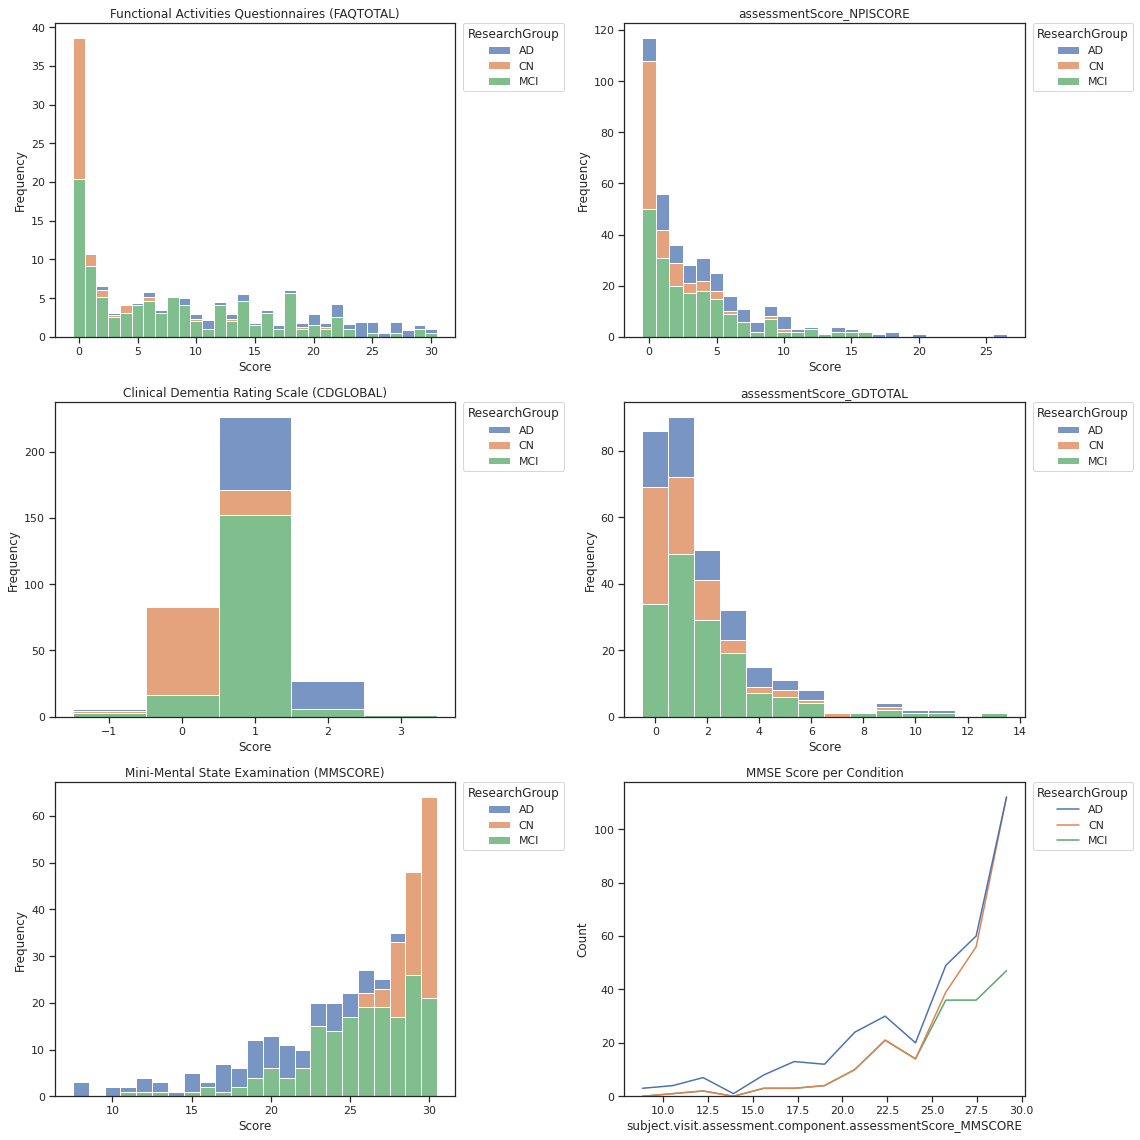

In [28]:
fig, axes = dplay.plot_meta_settings(rows=3)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore_FAQTOTAL', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Functional Activities Questionnaires (FAQTOTAL)','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore_NPISCORE', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,1],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'assessmentScore_NPISCORE','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore_CDGLOBAL', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[1,0],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Clinical Dementia Rating Scale (CDGLOBAL)','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore_GDTOTAL', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[1,1],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'assessmentScore_GDTOTAL','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore_MMSCORE', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[2,0],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Mini-Mental State Examination (MMSCORE)','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    x='subject.visit.assessment.component.assessmentScore_MMSCORE',
    hue='subject.researchGroup',
    discrete=False,
    ax=axes[2,1],
    plot_kws={'element':'poly','fill':False},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'MMSE Score per Condition'}
)

plt.show()

## Visualise brain slices

### Create Image generator

In [29]:
SKIP_LAYERS = 10
LIMIT_LAYERS = 70

In [33]:
image_AD_generator = adni.load_images(
    adni.get_path_from_files(adni.get_files(adni.path.disorders.AD, adni.category_cols))
)
image_CN_generator = adni.load_images(
    adni.get_path_from_files(adni.load_files(adni.path.disorders.CN, adni.category_cols))
)
image_MCI_generator = adni.load_images(
    adni.get_path_from_files(adni.load_files(adni.path.disorders.MCI, adni.category_cols))
)

('../data/SPM_categorised/AD/', ['subject.researchGroup', 'subject.subjectIdentifier', 'subject.study.imagingProtocol.imageUID', 'image_nbr', 'filename', 'path'], <function split_custom_filename at 0x7fa6b3209700>)
Root path: ../data/SPM_categorised/AD/            
Loaded files: 0            
Columns:
	subject.researchGroup
	subject.subjectIdentifier
	subject.study.imagingProtocol.imageUID
	image_nbr
	filename
	path
('../data/SPM_categorised/CN/', ['subject.researchGroup', 'subject.subjectIdentifier', 'subject.study.imagingProtocol.imageUID', 'image_nbr', 'filename', 'path'], <function split_custom_filename at 0x7fa6b3209700>)
Root path: ../data/SPM_categorised/CN/            
Loaded files: 0            
Columns:
	subject.researchGroup
	subject.subjectIdentifier
	subject.study.imagingProtocol.imageUID
	image_nbr
	filename
	path
('../data/SPM_categorised/MCI/', ['subject.researchGroup', 'subject.subjectIdentifier', 'subject.study.imagingProtocol.imageUID', 'image_nbr', 'filename', 'path

In [34]:
### Testing functions
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi

In [35]:
all_image = adni.load_images()

In [36]:
test_image = next(all_image)

FileNotFoundError: No such file or no access: '../data/SPM_preprocessed_normalized/ADNI1iwADNI_041_S_1418_PET_30_min_3D_FDG__4i_16s__br_raw_20101108092713710_1_S94411_I203170.nii'

In [ ]:
test_image.shape

In [37]:
plot_anat(test_image, draw_cross=False, display_mode='z',cut_coords=20,annotate=False)

NameError: name 'test_image' is not defined

In [38]:
images_AD_array = adni.to_array(list(image_AD_generator))
images_CN_array = adni.to_array(list(image_CN_generator))
images_MCI_array = adni.to_array(list(image_MCI_generator))

In [ ]:
images_AD = next(images_AD_array)[0]
images_CN = next(images_CN_array)[0]
images_MCI = next(images_CN_array)[0]

### Coronal plane (From top)

In [ ]:

image_AD_slices = [images_AD[layer,:,:] for layer in range(0,images_AD.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_AD_slices)
plt.suptitle("Coronal plane - AD")  

In [ ]:

image_CN_slices = [images_CN[layer,:,:] for layer in range(0,images_CN.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_CN_slices)
plt.suptitle("Coronal plane - CN")  

In [ ]:
image_MCI_slices = [images_MCI[layer,:,:] for layer in range(0,images_MCI.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_MCI_slices)
plt.suptitle("Coronal plane - MCI")  

### Sagittal plane (From front)

In [ ]:
image_slices = [images_AD[:,layer,:] for layer in range(0,images_AD.shape[1], SKIP_LAYERS)]
dplay.display_advanced_plot(image_slices)
plt.suptitle("Sagittal plane")  

### Horisontal plane (from side)

In [ ]:
image_slices = [images_AD[:,:,layer] for layer in range(0,images_AD.shape[2], SKIP_LAYERS)]
dplay.display_advanced_plot(image_slices)
plt.suptitle("Horisonal plane")  

# Notes
* Dont take 60 min dynamic - Iter(Brain Mod

In [ ]:
# Can we see a difference between MCI, CN and AD?

In [ ]:
# How is the images before preprocess?

In [ ]:
# How is the images after preprocess?

In [ ]:
# Distribution? (Can be text as well)